<a href="https://colab.research.google.com/github/ranaehelal/Android_learning_app/blob/master/NTI_CV_Day2_Task1_Video_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



## Read the Image and Convert to Different Color Spaces

In [ ]:
img = cv2.imread('/content/jellyfish.jpg')

In [ ]:
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [ ]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


In [ ]:
bgr_from_hsv = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)


## threshold

In [ ]:
ret,thre = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY)

In [ ]:
thre

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

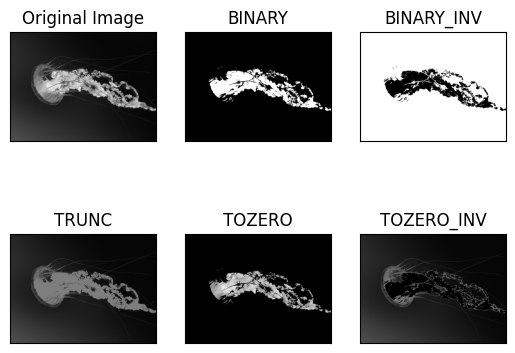

In [ ]:
import matplotlib.pyplot as plt
img = img_gray
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Working with Videos

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
cap = cv2.VideoCapture('clock.mp4')


In [ ]:
cap

< cv2.VideoCapture 0x7b14c23d1af0>

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (640,  480))


In [ ]:
frame_count=0

## Define Color Range in HSV

In [ ]:
lower_purple_RGB = np.array([0, 0, 0], dtype='uint8')
upper_purple_RGB = np.array([255, 255, 255], dtype='uint8')

lower_purple_HSV = cv2.cvtColor(lower_purple_RGB.reshape(1, 1, 3), cv2.COLOR_RGB2HSV)[0][0]
upper_purple_HSV = cv2.cvtColor(upper_purple_RGB.reshape(1, 1, 3), cv2.COLOR_RGB2HSV)[0][0]


In [ ]:
while cap.isOpened() and frame_count < 200:
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame. Exiting...")
        break

    frame = cv2.resize(frame, (640, 480))

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(hsv, lower_purple_HSV, upper_purple_HSV)

    result = cv2.bitwise_and(frame, frame, mask=mask)
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)


    out.write(result)

    frame_count += 1

cap.release()
out.release()


# Task2

In [ ]:
img = cv2.imread('girl.jpg')


In [ ]:
img.shape

(801, 800, 3)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_norm = gray / 255.0

## 1. Gaussian

In [ ]:
mean = 0
var = 0.01
sigma = var ** 0.5


gaussian = np.random.normal(mean, sigma, (img.shape[0],img.shape[1]))
gaussian_noisy = gray_norm + gaussian
gaussian_noisy = np.clip(gaussian_noisy, 0, 1)


In [ ]:
gaussian_noisy_uint8 = (gaussian_noisy * 255).astype(np.uint8) #to use with OpenCV
filtered_uint8 = cv2.GaussianBlur(gaussian_noisy_uint8,  (3, 3), 0)

filtered_norm = filtered_uint8 / 255.0



In [ ]:
_, global_thresholding = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)



adaptive_mean_thresholding = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY, 11, 2)



adaptive_gaussian_thresholding = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, 11, 2)


_, otsu_thresholding = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


blur = cv2.GaussianBlur(gray, (5,5), 0)
_, otsu_guassian  = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


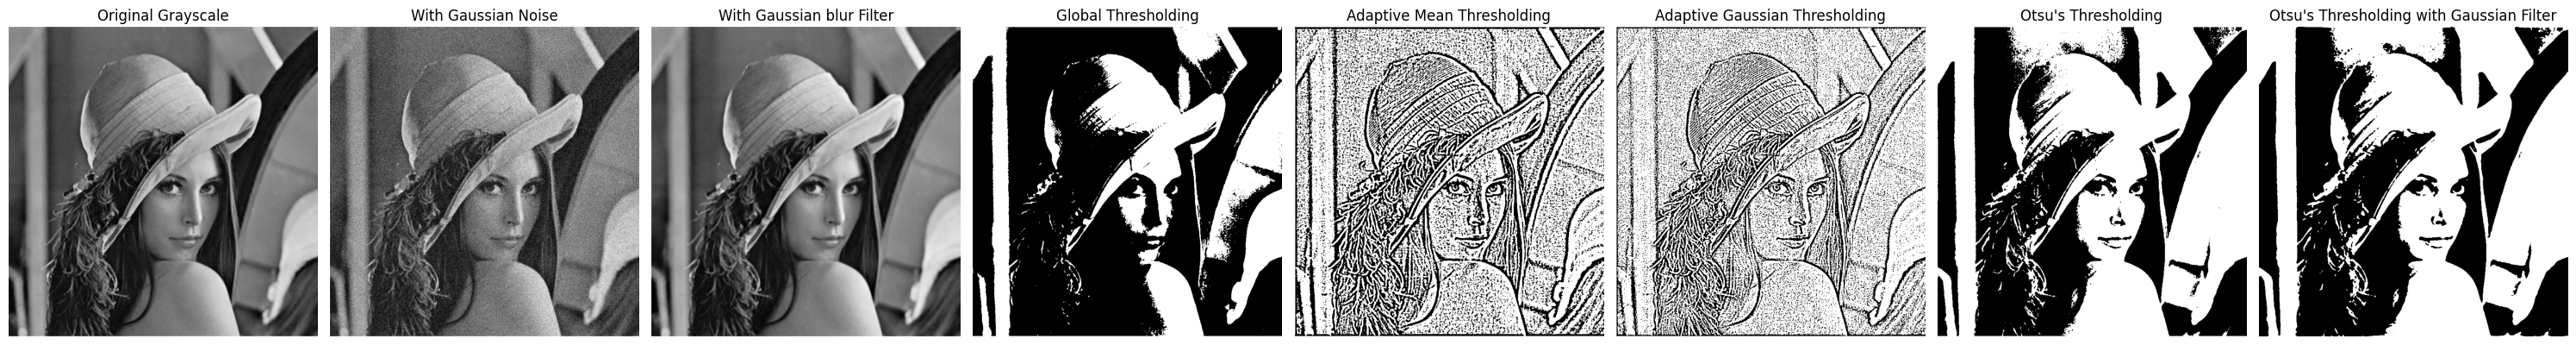

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 14))
plt.subplot(1, 8, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 8, 2)
plt.imshow(gaussian_noisy, cmap='gray')
plt.title("With Gaussian Noise")
plt.axis('off')

plt.subplot(1, 8, 3)
plt.imshow(blur, cmap='gray')
plt.title("With Gaussian blur Filter")
plt.axis('off')

plt.subplot(1, 8,4 )
plt.imshow(global_thresholding, cmap='gray')
plt.title("Global Thresholding")
plt.axis('off')

plt.subplot(1, 8, 5)
plt.imshow(adaptive_mean_thresholding, cmap='gray')
plt.title("Adaptive Mean Thresholding")
plt.axis('off')

plt.subplot(1, 8, 6)
plt.imshow(adaptive_gaussian_thresholding, cmap='gray')
plt.title("Adaptive Gaussian Thresholding")
plt.axis('off')

plt.subplot(1, 8, 7)
plt.imshow(otsu_thresholding, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')

plt.subplot(1, 8, 8)
plt.imshow(otsu_guassian, cmap='gray')
plt.title("Otsu's Thresholding with Gaussian Filter")
plt.axis('off')

plt.tight_layout()

plt.show()


##Visualize HSV, Converted BGR, and Grayscale Images

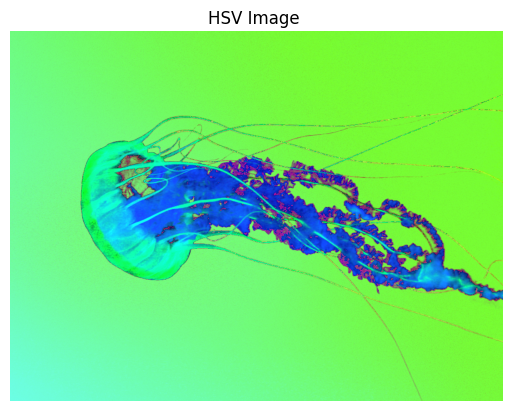

In [ ]:
plt.imshow(img_hsv)
plt.title("HSV Image ")
plt.axis('off')
plt.show()

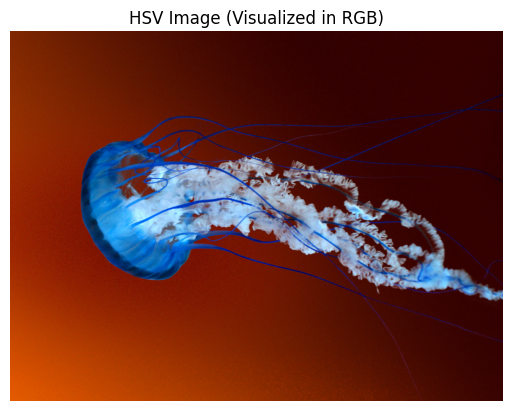

In [ ]:
plt.imshow(bgr_from_hsv)
plt.title("HSV Image (Visualized in RGB)")
plt.axis('off')
plt.show()

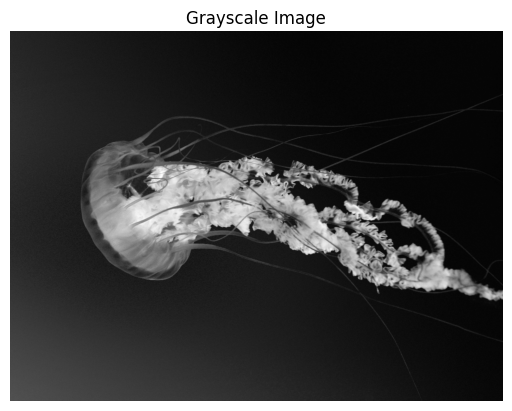

In [ ]:
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

##Resize



In [ ]:
img_gray.shape

(768, 1024)

array([[38, 36, 38, ...,  7,  6,  6],
       [38, 36, 38, ...,  6,  7,  5],
       [39, 38, 40, ...,  6,  5,  7],
       ...,
       [81, 79, 80, ..., 10,  7,  9],
       [80, 78, 81, ...,  8,  9,  7],
       [81, 79, 82, ...,  8, 11, 10]], dtype=uint8)
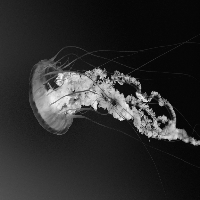

In [ ]:
cv2.resize(img_gray, (200,200))

array([[37, 37, 39, ...,  7,  6,  6],
       [38, 38, 38, ...,  6,  7,  6],
       [39, 39, 37, ...,  6,  6,  6],
       ...,
       [79, 81, 80, ...,  8, 10, 11],
       [81, 81, 80, ...,  8, 10, 10],
       [82, 81, 79, ..., 12, 10,  9]], dtype=uint8)
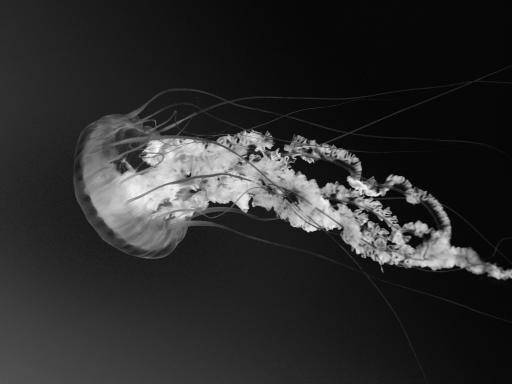

In [ ]:
cv2.resize(img_gray,None,fx=0.5,fy=0.5)

## Rotate

In [ ]:
(h, w) = img_RGB.shape[:2]

center = (w // 2, h // 2)

angle = 45
scale = 1.0
M = cv2.getRotationMatrix2D(center, angle, scale)

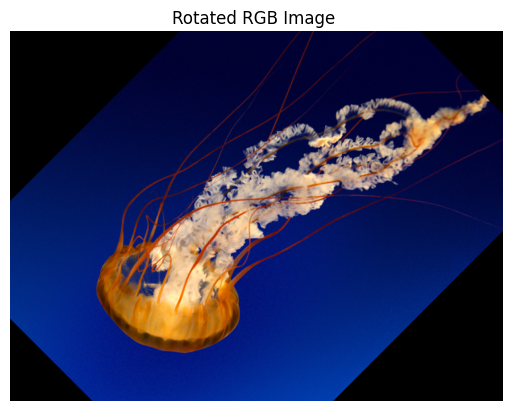

In [ ]:
rotated_rgb = cv2.warpAffine(img_RGB, M, (w, h))

plt.imshow(rotated_rgb)
plt.title("Rotated RGB Image ")
plt.axis('off')
plt.show()